# Prediction using different Classifiers and Comparitive Analysis + EDA
<br>
<br>
Whenever we encounter a classification problem, we have a lot of classifiers to choose from. I have chosen a dataset on which i applied different classification algorithms and also validated it using Precision, Recall, F1, ROC and AUC Curve.<br>
I have also explained every code and result for better understanding of this problem.
<br>
<br>
<b>Problem Statement :</b>
<br>
<br>
In this Python Kernel, I try to predict the income of an individual. The income can be <=50k or >=50K.<br>
There are 14 different features on which the income can be predicted.<br>
I have done EDA on the dataset, some visalisations for better understanding and ran different classification models. 
<br>
For prediction i have used classification models, and have done a comparative analysis on different classifiers on the basis of accuracy, precision, recall, F1, ROC and AUC Curve.
<br>

[EDA](#eda)<br>
[Visalisations](#vis)<br>
[ROC and AUC](#roc)<br>
[Comparative Analysis](#analysis)<br>
<br>
<b>Dataset :</b><a> https://github.com/akashramdev/Income_Classification - Link to Github</a>
<br>
<br>
<b>Classifiers Used :</b>
<br>
<br>

[1.Gradient Boosting Classifier](#gbrt)<br>
[2.Random Forest Classifier](#forest)<br>
[3.Decision Tree Classifier](#tree)<br>
[4.KNN Classifier](#knn)<br>
[5.GaussianNB](#clf)<br>
[6.CategoricalNB](#cnb)<br>
<br>
<b>Features :</b>
<br>
<ol>
<li>Age: The age of an individual</li>
<li>Workclass: Employment status of an individual</li>
<li>Fnlwgt: (Final weight) This is the number of people the entry represents</li>
<li>Education: The highest level of education achieved by an individual</li>
<li>Education-num: the highest level of education achieved in numerical form</li>
<li>Marital-Status: Marital status of an individual</li>
<li>Occupation: Type of occupation of an individual</li>
<li>Relationship: Represents what this individual is relative to others</li>
<li>Race: Descriptions of an individual’s race</li>
<li>Sex: the biological sex of the individual</li>
<li>Capital-gain: Capital gains for an individual</li>
<li>Capital-loss: Capital loss for an individual!</li>
<li>Hours-per-week: The hours an individual has reported to work per week!</li>
<li>Native-country: Country of origin for an individual!</li>
<li>Income: Whether or not an individual makes more than $50,000 annually</li>
</ol>



### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

### Import Dataset

In [2]:
df = pd.read_csv("income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA
<a id = "eda"></a>

<b>Dimension Of Dataset</b>

In [3]:
df.shape

(32561, 15)

<b>I have changed the column names as they are not correctly named
<br>
Have replaced - with _</b>

In [4]:
#Rename Columns
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<b>Summary of Dataset</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<b>There are 32561 entries in the dataset with 15 columns, dataset contains 9 character variables and 6 numerical variables<br>
- <b>Income is our target variable.</b><br>
- <b>There is no missing value and the data looks fine.</b> </b>

<b>Statistical analysis of Dataset</b>

In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Checking for null values</b>

In [7]:
#Check null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

<b>We can observe there are no null values.
<br>
But if we have a closer look at the data and print values for each feature as done below, we can see '?' in workclass, occupation and native_country.
<br>
Python does not treat '?' as null values, so we will have to replace it later.</b>

In [8]:
for value in df.columns: 
    
    print(df[value].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

<b>Replacing '?' in workclass, occupation and native_country with null values</b>

In [9]:

df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

<b>Now if we check value count, we don't see '?' as it has been replaced with null values</b>

In [10]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<b>Checking for null values again</b>

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

<b>We can observe, null values are present in the dataset, which we will deal later before we start training our dataset.</b>

## Visualisation
<a id = "vis"></a>

### Visualisation of Income and Income w.r.t other Parameters

<b>Pie chart and bar graph representing Income variable and its distribution 
<br>
Almost 75% of earn less than 50K</b>

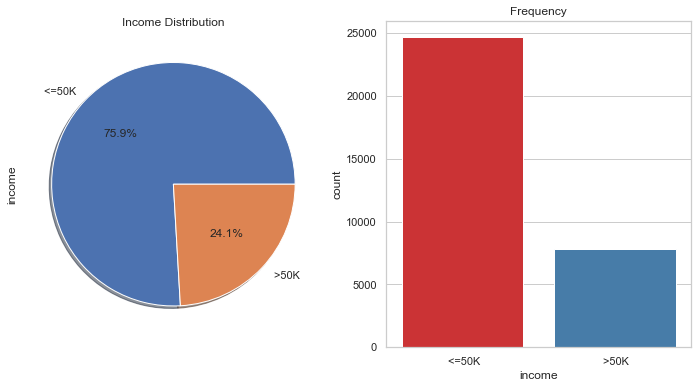

In [14]:


f,ax=plt.subplots(1,2,figsize=(12,6))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Distribution')

ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency")

plt.show()


<b>Distribution of Income w.r.t Sex.
<br>
We can observe males are earning more than Females</b>

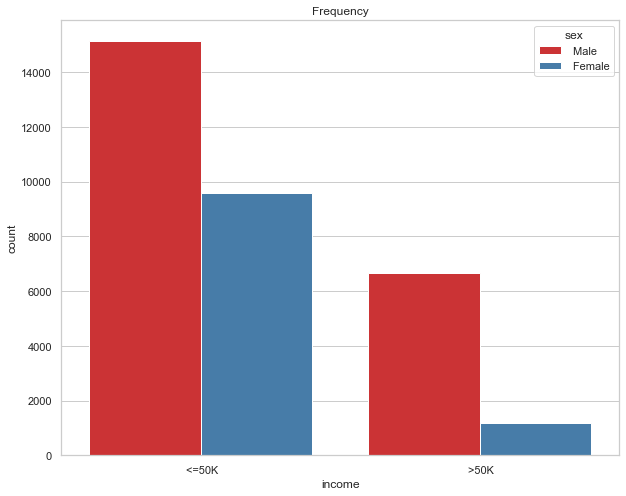

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency")
plt.show()

<b>Distribution of Income w.r.t Race.
<br>
We can observe people from white racial background are earning more.</b>

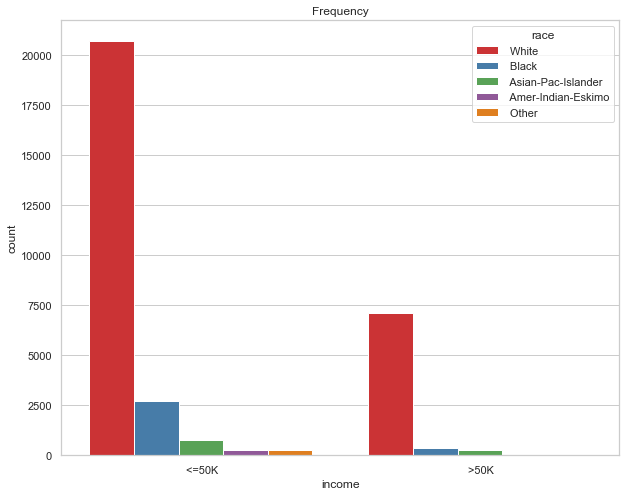

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency")
plt.show()

<b>Distribution of Income w.r.t Education.</b>


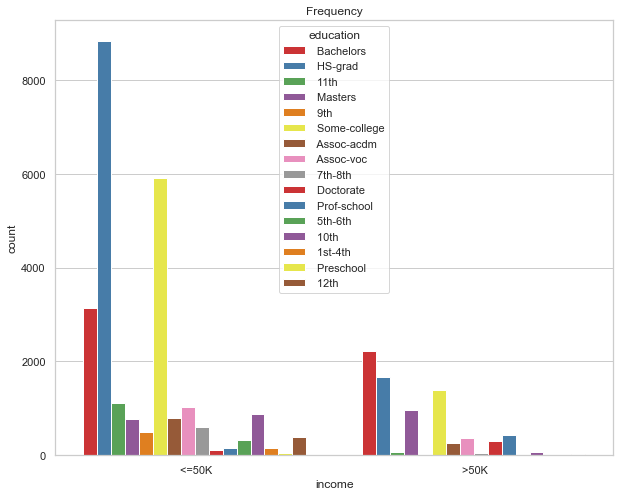

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="education", data=df, palette="Set1")
ax.set_title("Frequency")
plt.show()

<b>Distribution of Income w.r.t Native Country.
<br>
We can observe people from United States are earning more.</b>

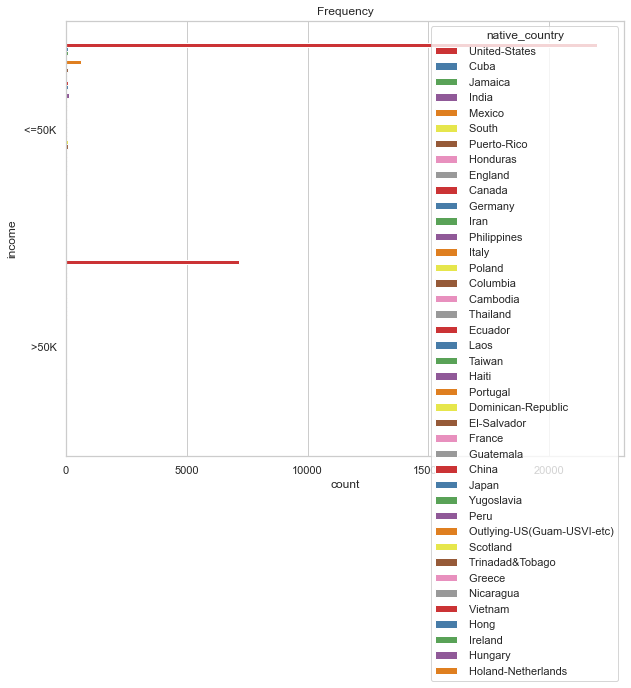

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(y="income", hue="native_country", data=df, palette="Set1")
ax.set_title("Frequency")
plt.show()

<b>Distribution of Income w.r.t Occupation.</b>

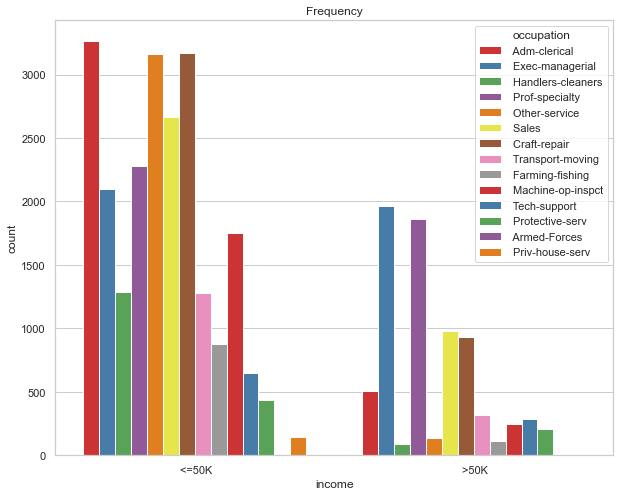

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="occupation", data=df, palette="Set1")
ax.set_title("Frequency")
plt.show()

<b>Distribution of Income w.r.t Workclass.
<br>
We can observe people from Private Sector are earning more.</b>

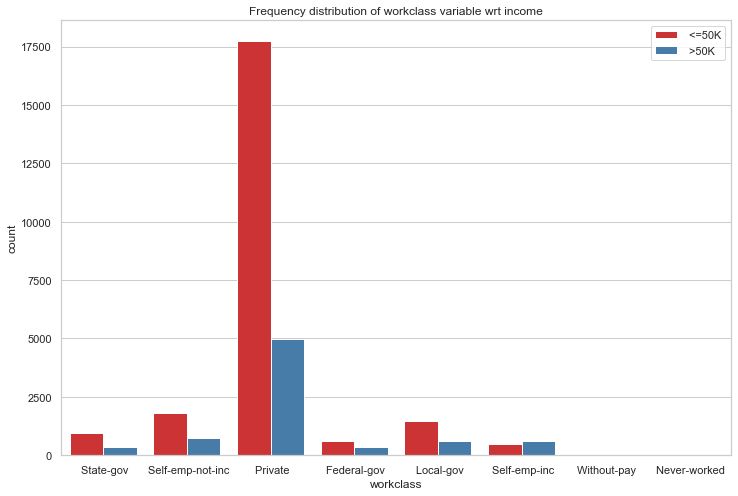

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

<b>Distribution of Workclass w.r.t sex.</b>


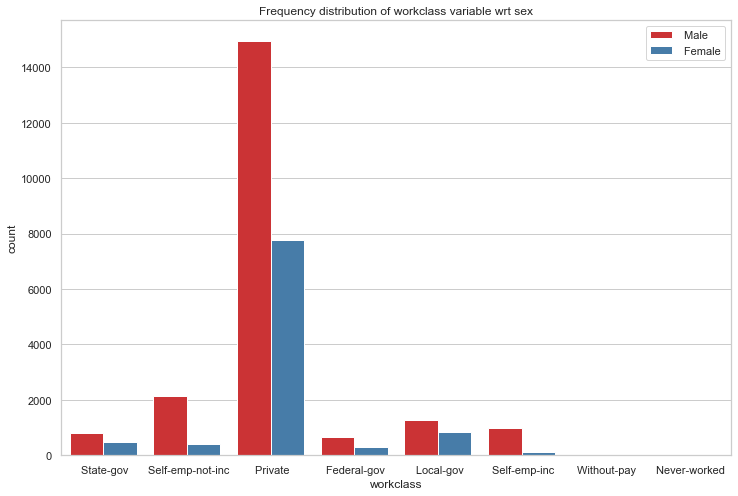

In [21]:

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

<b>Distribution of Occupation</b>

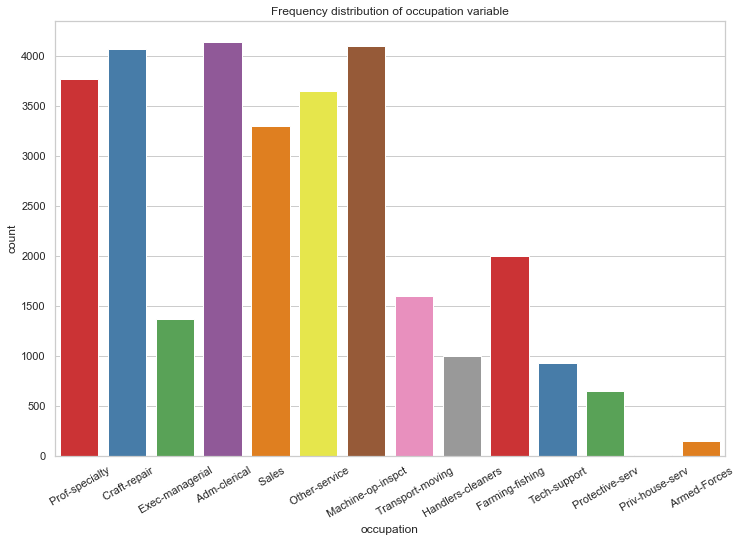

In [22]:
#Occupation
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

<b>Distribution of Age</b>

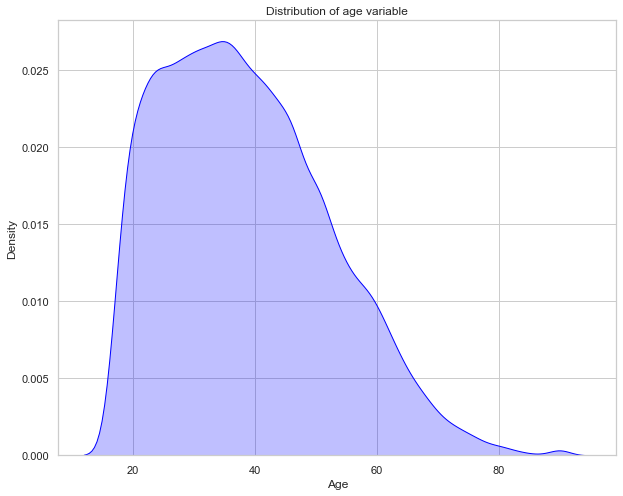

In [23]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age")
ax = sns.kdeplot(x, shade=True, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

### Outliers

<b>Outliers in age </b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


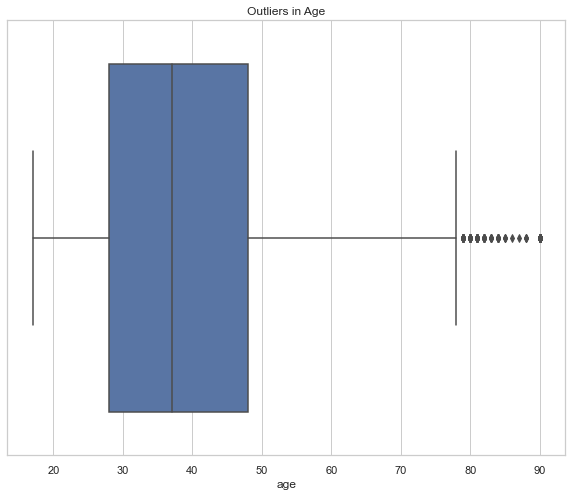

In [24]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Outliers in Age")
plt.show()

<b>This boxplot shows senior people are earning more than younger people</b>

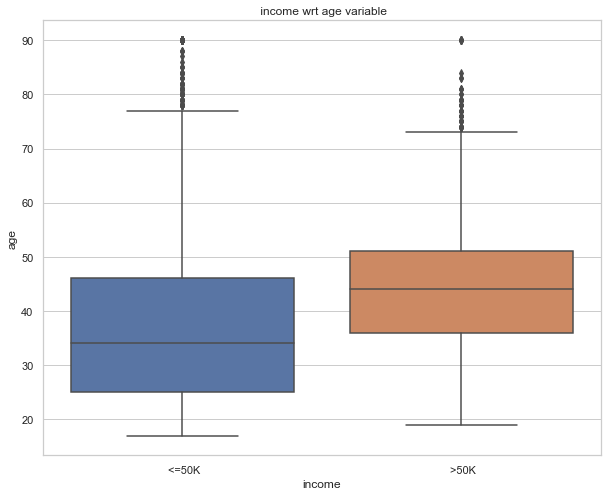

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title(" income wrt age variable")
plt.show()

### PairPlot

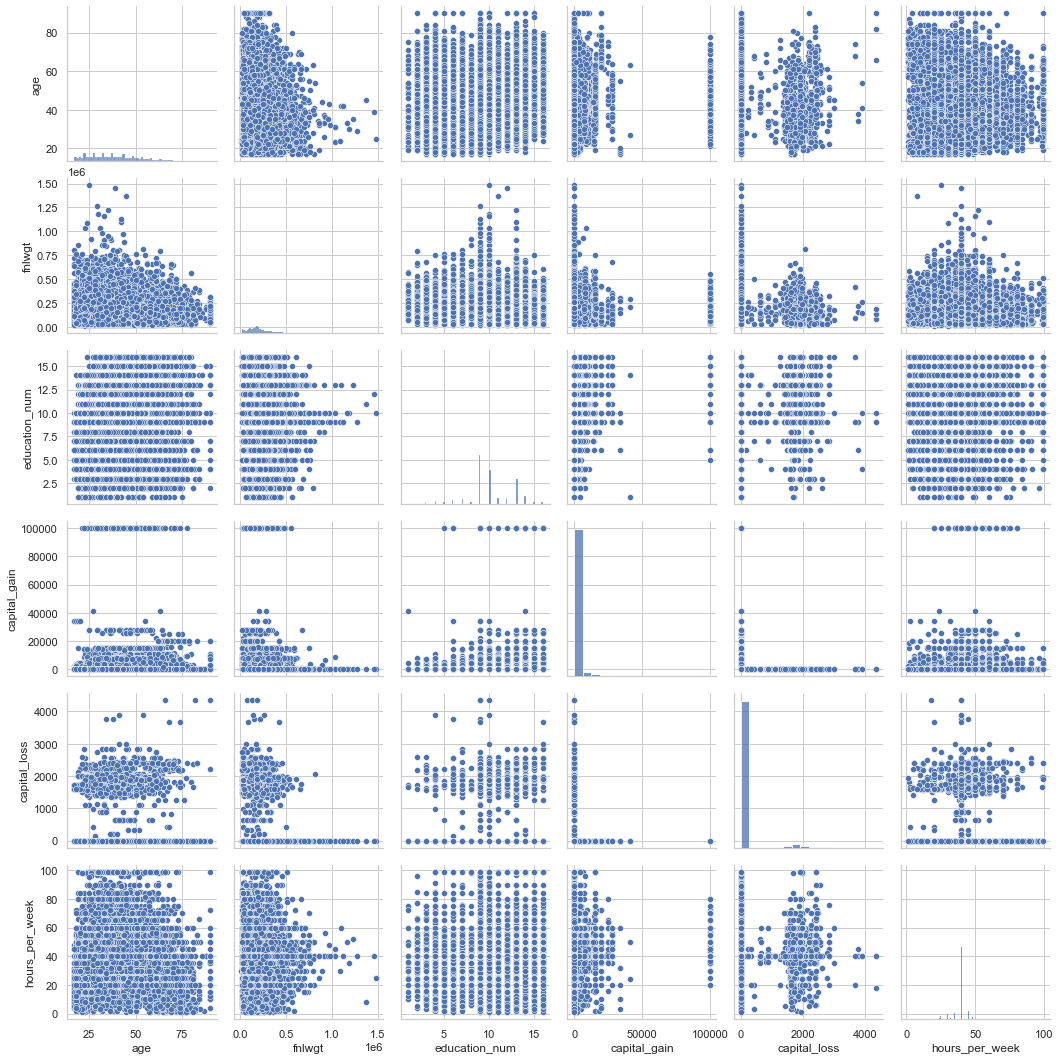

In [26]:
sns.pairplot(df)
plt.show()

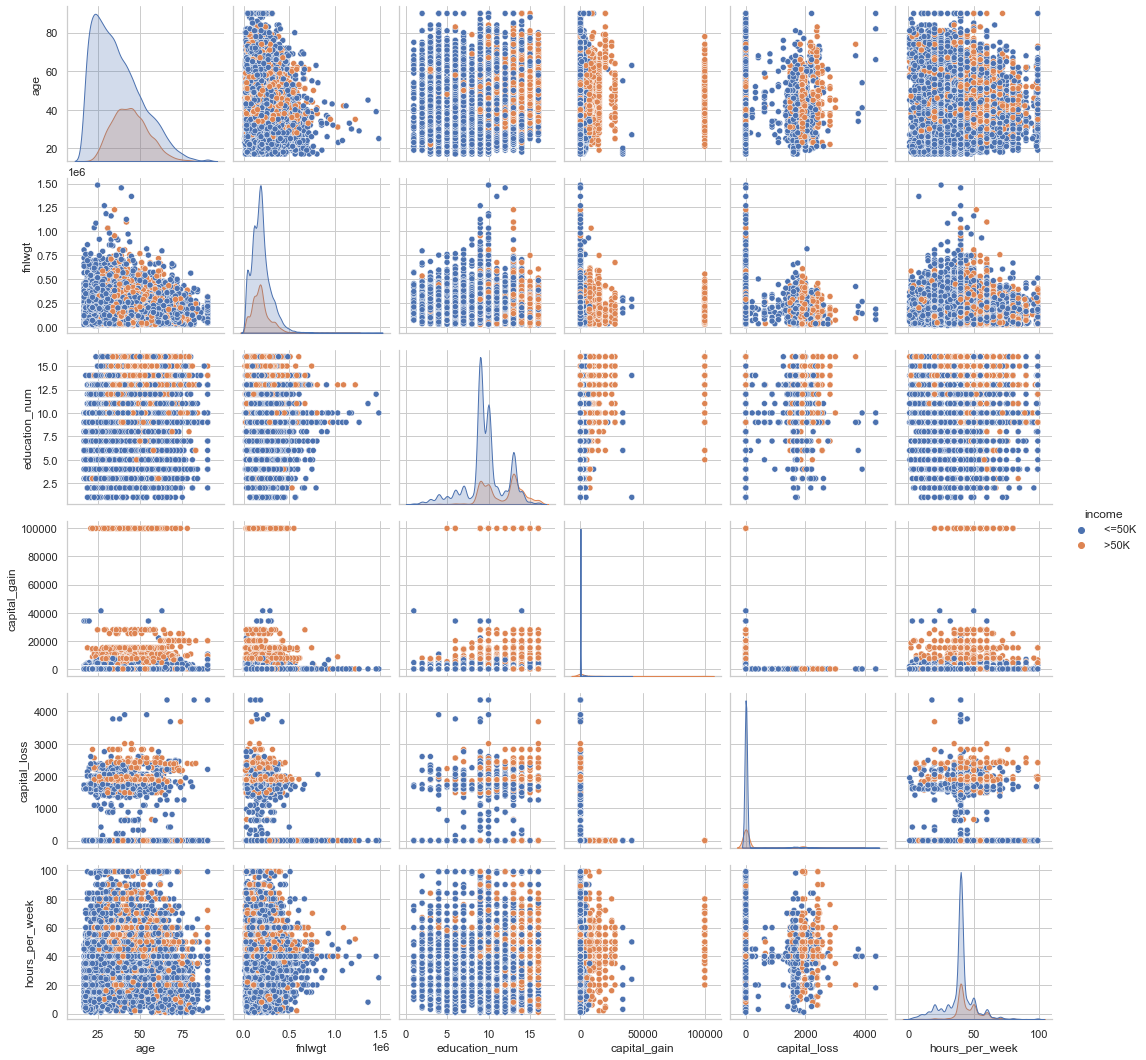

In [27]:
sns.pairplot(df, hue="income")
plt.show()


### Correlation

<b>Correlation matrix depicts the correlation coefficients between all pairs of features in the data.<br>
    -1 indicates a perfectly negative linear correlation between two variables<br>
     0 indicates no linear correlation between two variables<br>
     1 indicates a perfectly positive linear correlation between two variables<br><br>
   There is no strong correlation between variables</b>

In [28]:
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('YlGn'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


## Filling missing values

In [29]:
df["workclass"].fillna('ffill',inplace=True)
df["occupation"].fillna('ffill',inplace=True)
df["native_country"].fillna('ffill',inplace=True)

<b>Checking null values again and we can see there are no null values in our dataset</b>

In [30]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Label Encoding 
<b>Label Encoding is used to convert the labels into numeric form to convert them into a machine redable form. The algorithms can then perform well over these.</b>

In [31]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB
None


<b>Data Preview</b>

In [33]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


### Split Data Training and Testing
<b>Here we have split our data into X and y. X contains the dataset after dropping the income column, while y contains the income column.<br>
We have split the data in a 80:20 ratio and used stratify.<br>
Random State will control the shuffling of the data before applying the split.<br>
Stratify will preserve the proportion of target as in original dataset, in the train and test datasets as well.</b>

In [34]:
X = df.drop(['income'], axis=1)

y = df['income']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [36]:
X_train.shape, X_test.shape

((26048, 14), (6513, 14))

## Confusion Matrix, Accuracy, Precision, Recall and F1
<br>
<br>
<b>
 A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
<br>
<br>
<img src="Images/confusion.png" width=200 height=200 />

<br>
    Accuracy is the number of correct predictions over all predictions.
    <br><br>
    <img src="Images/accuracy.png" width=500 height=500 />
<br><br>
    Precision, Recall, and F1-Score are used to get a more fine idea of how well a classifier is performing, as opposed to just looking at overall accuracy.
    
<br><br>
    1.Precision is a measure of how many of the positive predictions made are correct (true positives).
    <img src="Images/precision.png" width=400 height=400 />
    
<br><br>
   2.Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.
    <img src="Images/recall.png" width=400 height=400 />
<br><br>
   3.F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.
    <img src="Images/f1.png" width=200 height=200 />
<br>
</b>


# Classifiers

## Gradient Boosting
<a id = "gbrt"></a>
<b>It is one of the most powerful algorithms and is used to minimize the bias error of the model.This algorithm can be used for predicting not only continuous variables but also categorical variables. That means it can be used in classification as well as regression problems.</b>


<b>Our accuracy for Gradient Boosting is good, as there is not a greater difference between the training and the testing set and it is high.</b>

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=5)

gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.869


<b>Feature Importance is used so we can interpret our data easily. It assigns a score to the input feature based on how useful they are at predicting the target variable.</b>
<br>
<br>
<b>Here we can see the Relationship feature plays an import role, so we may conclude that individual having a family are paid more than single people.</b>

Feature importances:
[0.06041035 0.01052475 0.01667447 0.00140244 0.2012106  0.01452818
 0.02906484 0.34755274 0.00170634 0.00472817 0.21124635 0.05791746
 0.04027925 0.00275405]


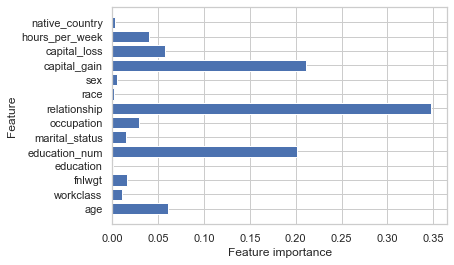

In [38]:
print("Feature importances:\n{}".format(gbrt.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(gbrt)

<b>
In our dataset 0 represents Income less than and equal to 50k and 1 represents Income more than and equal to 50k 
<br>
For our dataset the True Positive(11) and True Negative(00) should be high and False Positive(01) and False Negative(10) should be low.
</b>

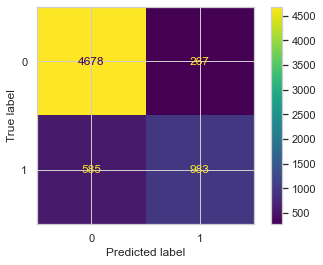

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt, X_test, y_test)  
plt.show()

<b>Precision, Recall and F1</b>

In [40]:
y_pred=gbrt.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.8641827054203611
Recall: 0.8691847075080608
F1 Score: 0.8638412983660169


### Random Forest
<a id = "forest"></a>
<b>It is a supervised machine learning algorithm which is mainly used in classification and regression problems.Though it performs better on classification problems. It builds decison trees on different samples and takes their majority vote for classification and average in case of regression.</b>

<b>Our accuracy for Random Forest is not so good, as there is a huge difference between the training and the testing set and the tarining set accuracy is very high, which might be the case of overfitting.</b>

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, random_state=0)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.857


<b>Almost all features are evenly distributed, but major importance is given to Final weight and Age</b>

Feature importances:
[0.1491994  0.03960667 0.16711626 0.03271807 0.09094268 0.07183834
 0.06722472 0.10416357 0.01453312 0.01153336 0.11722811 0.032667
 0.08270535 0.01852334]


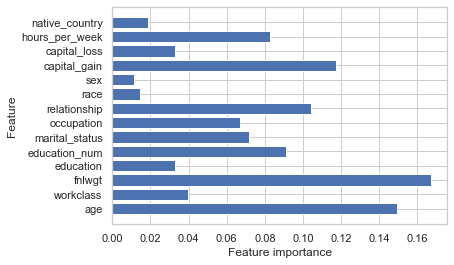

In [42]:
print("Feature importances:\n{}".format(forest.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

<b>Confusion Matrix</b>

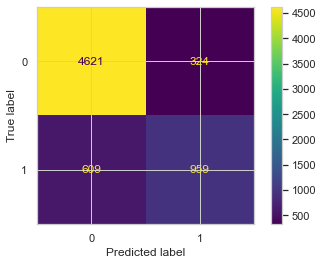

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest, X_test, y_test)  
plt.show()

<b>Precision, Recall and F1</b>

In [44]:
y_pred=forest.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.8507929500553282
Recall: 0.8567480423767849
F1 Score: 0.8515941881538992


### Decision Tree
<a id = "tree"></a>
<b>Decison tree can also be used for both, classification and regression problems. It uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.</b>

<b>Our accuracy for Decision Tree is good, but it's low compared to Gradient Boosting</b>

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)#### what happened here? training of the algo/model starts here

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.849
Accuracy on testing set: 0.840


<b>Here also Relationship has been given highest importance through Feature Importance.</b>

Feature importances:
[0.05648337 0.         0.00063219 0.         0.20812761 0.
 0.00476903 0.47272467 0.         0.         0.22819411 0.01759186
 0.00980527 0.00167189]


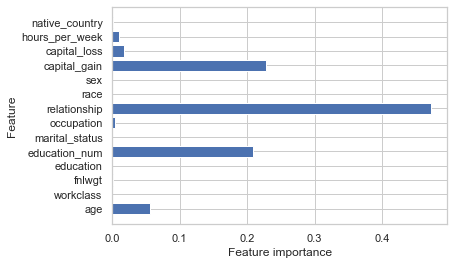

In [46]:
print("Feature importances:\n{}".format(tree.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

<b>Confusion Matrix</b>

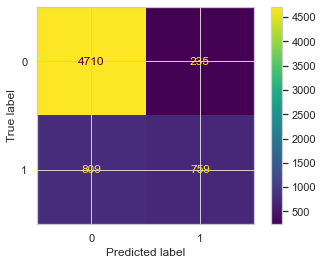

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test)  
plt.show()

<b>Precision, Recall and F1</b>

In [48]:
y_pred=tree.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.8317880074737474
Recall: 0.839705204974666
F1 Score: 0.8261451488775979


### KNN
<a id = "knn"></a>
<b>It is known as K Nearest Neighbor algorithm. This is supervised machine learning algorithm and is used for both classifcation and regression but mostly for classification. It is used to assign missing values and for resampling datasets.As the name suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.</b>

<b>Our accuracy for KNN is not so good, as there is a significant difference between the training and the testing score and both of the accuracy are low.</b>

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) 
print("KNN Training Score", knn.score(X_train,y_train))
print("KNN Test Score", knn.score(X_test,y_test))

KNN Training Score 0.8343442874692875
KNN Test Score 0.7718409335175802


<b>Confusion Matrix</b>

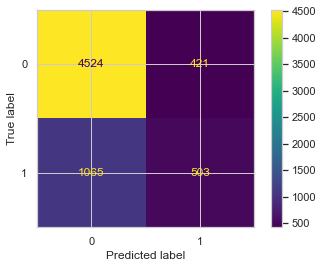

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

<b>Precision, Recall and F1</b>

In [51]:
y_pred=knn.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.7456305553444609
Recall: 0.7718409335175802
F1 Score: 0.7493340004346647


### GaussianNB
<a id = "clf"></a>
<b>This classifier is employed when the predictor values are continuous and are expected to follow a Gaussian distribution.It is used in classification problems.It makes predictions about unknown classes using the Bayes theory of probability.</b>

<b>Our accuracy for GaussianNB is not good, as both the training and testing accuracy are low.</b>

In [52]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.795
Accuracy on test set: 0.795


<b>Confusion Matrix</b>

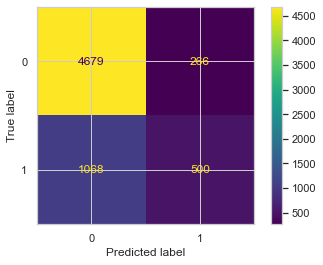

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

<b>Precision, Recall and F1</b>

In [54]:
y_pred=clf.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.7753015871962099
Recall: 0.7951788730231844
F1 Score: 0.76767070369269


### CategoricalNB
<a id = "cnb"></a>
<b>It is used for classification with discrete features. The categorical distribution is the generalization of the Bernoulli distribution for a categorical random variable, i.e. for a discrete variable with more than two possible outcomes, such as the roll of a die. </b>

<b>Our accuracy for CategoricalNB is good, and at par with Gradient boosting as there is not a greater difference between the training and the testing set and it is high. But the testing accuracy is a bit low as compared to Gradient boosting.</b>

In [55]:
from sklearn.naive_bayes import CategoricalNB

CNB = CategoricalNB()

CNB.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(CNB.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(CNB.score(X_test, y_test)))

Accuracy on training set: 0.888
Accuracy on test set: 0.857


<b>Confusion Matrix</b>

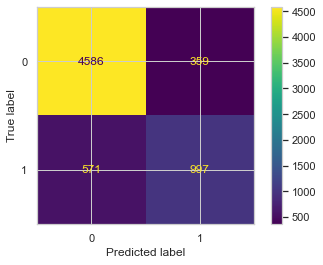

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(CNB, X_test, y_test)  
plt.show()

<b>Precision, Recall and F1</b>

In [57]:
y_pred=CNB.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.8521950704059174
Recall: 0.8572086596038692
F1 Score: 0.8535305348354496


## ROC Curve and AUC Score
<a id = "roc"></a>


<b> The AUC-ROC curve helps us visualize how well our machine learning classifier is performing.<br><br>
    The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.It is a probability curve that plots the True Positive Rate against False Positive Rate at various threshold values.<br><br>
    The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
   </b>

In [58]:
forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
gbrt.fit(X_train, y_train)
tree.fit(X_train, y_train)
clf.fit(X_train, y_train)
CNB.fit(X_train, y_train)

CategoricalNB()

In [59]:
pred_prob1 = forest.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = tree.predict_proba(X_test)
pred_prob4 = gbrt.predict_proba(X_test)
pred_prob5 = clf.predict_proba(X_test)
pred_prob6 = CNB.predict_proba(X_test)

In [60]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [61]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print("auc_score RF:",auc_score1)
print("auc_score KNN:",auc_score2)
print("auc_score DT:",auc_score3)
print("auc_score GBRT:",auc_score4)
print("auc_score CLF:",auc_score5)
print("auc_score CNB:",auc_score6)

auc_score RF: 0.8998863132209407
auc_score KNN: 0.6667460690039413
auc_score DT: 0.8762119926332516
auc_score GBRT: 0.9241878133963393
auc_score CLF: 0.8338269433152432
auc_score CNB: 0.9114549586265244


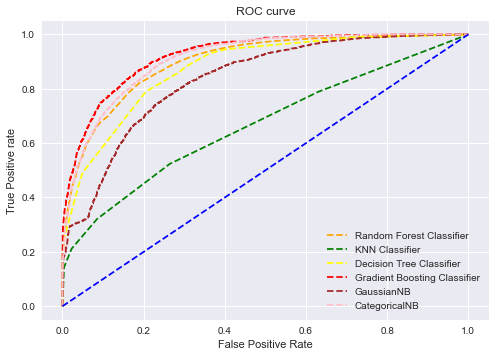

In [62]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision Tree Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Gradient Boosting Classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='GaussianNB')
plt.plot(fpr6, tpr6, linestyle='--',color='pink', label='CategoricalNB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

<b>It is evident from the plot that the AUC for the Gradient Boosting ROC curve is higher than that for the other classifiers ROC curve. Therefore, we can say that Gradient Boosting did a better job.
<br>
<br>
We applied different classifiers and predicted the accuracy along with Precision, Recall, F1, ROC and AOC Curve</b>




### Comparitive Analysis on Classifiers
<a id = "analysis"></a>
<br>
<img src="Images/analysis1.png" width="600" height="600" />


<b>We can make a conclusion that out of all the classifiers, Gradient Boosting Classifier gae the best training and testing accuracy, along with the Precision, Recall and F1. Which was again confirmed by the ROC Curve.<br><br>
Hence we can conclude that we should not just depend on the accuracy to validate the model, but also check confusion matrix, Precison, Recall, F1, ROC and AUC curve to completely validate our model and later on tweak the parameters in the respective algorithm to get better results. </b>